## Zero-Shot Inference

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from transformers import pipeline

In [ ]:
def predict_plausibility(csv_file, sentence_column):
    # Load the NLI model
    nli_model = pipeline("zero-shot-classification", model="roberta-large-mnli")

    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Iterate over sentences and get predictions
   #predictions = []
    #for sentence in df[sentence_column]:
     #   result = nli_model(sentence, ["plausible", "implausible"])
      #  predicted_label = result['labels'][0]
       # predictions.append(predicted_label)

    # Iterate over sentences and get predictions with probabilities
    probabilities = []
    predictions = []
    for sentence in df[sentence_column]:
        result = nli_model(sentence, ["plausible", "implausible"], multi_class=False)
        # 'plausible' is the first label
        prob_plausible = result['scores'][0] if result['labels'][0] == 'plausible' else result['scores'][1]
        probabilities.append(prob_plausible)
        predicted_label = result['labels'][0]
        predictions.append(predicted_label)
    # Add probabilities to the DataFrame
    df['Probability (Plausible)'] = probabilities

    # Add predictions to the DataFrame
    df['Zero-Shot Prediction'] = predictions

    return df

In [ ]:
predicted_df = predict_plausibility("/content/drive/MyDrive/datasets/augmented_processed/pep_test_processed.csv", "text")

In [ ]:
print(predicted_df.head())

   label                text  Probability (Plausible) Zero-Shot Prediction  \
0      1    Worm enter cave.                 0.852353            plausible   
1      1  Elephant toss cat.                 0.809380            plausible   
2      1     Beak tap purse.                 0.875054            plausible   
3      1      Wolf push cup.                 0.853015            plausible   
4      0       Pen etch oil.                 0.827822            plausible   

   mapped prediction  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  


In [ ]:
# Mapping dictionary
mapping = {'plausible': 1, 'implausible': 0}

# Apply the mapping
predicted_df['mapped prediction'] = predicted_df['Zero-Shot Prediction'].map(mapping)

In [ ]:
predicted_df.to_csv("/content/drive/MyDrive/datasets/augmented_processed/pep_test_predictions.csv", index=False)

## Metrics Evaluation

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/augmented_processed/pep_test_predictions.csv')
y_true = df['label']
y_pred = df['mapped prediction']
y_prob = df['Probability (Plausible)']

Accuracy: 0.501628664495114
Precision: 0.5
Recall: 0.8235294117647058
F1 Score: 0.6222222222222222
AUC-ROC: 0.5519056107291401


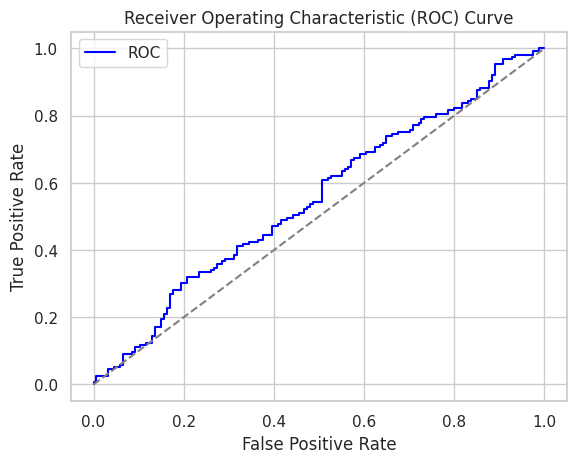

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import numpy as np

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, pos_label= 1)
recall = recall_score(y_true, y_pred, pos_label= 1)
f1 = f1_score(y_true, y_pred, pos_label= 1)
auc_roc = roc_auc_score(y_true, y_prob)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {auc_roc}")

# Plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_prob)

plt.plot(fpr, tpr, color='blue', label='ROC')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Visualize metrics

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

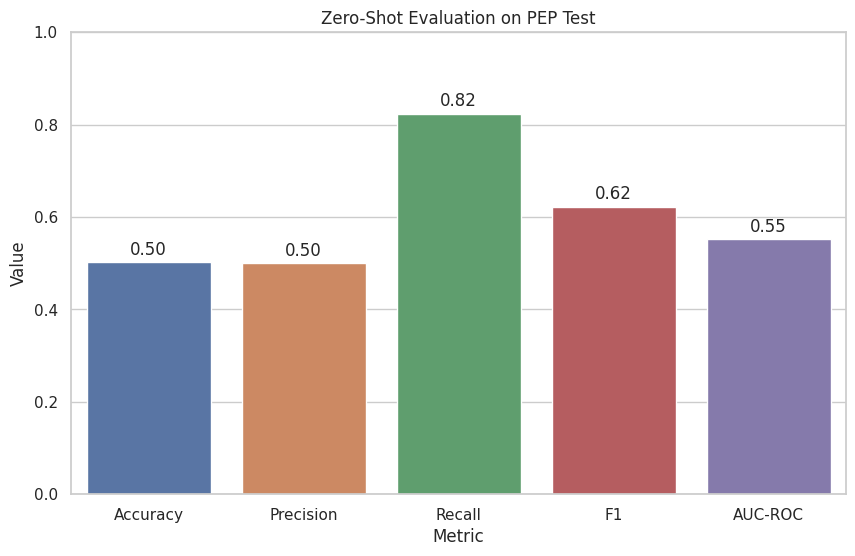

In [ ]:
accuracy = 0.501628664495114
precision = 0.5
recall = 0.8235294117647058
f1 = 0.6222222222222222
AUCROC = 0.5519056107291401

data = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC-ROC'],
    'Values': [accuracy, precision, recall, f1, AUCROC]
}

df = pd.DataFrame(data)

# Setting the style
sns.set(style="whitegrid")

# Creating the bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Metrics', y='Values', data=df)

# Adding the value labels on each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

plt.ylim(0, 1)
plt.title('Zero-Shot Evaluation on PEP Test')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()


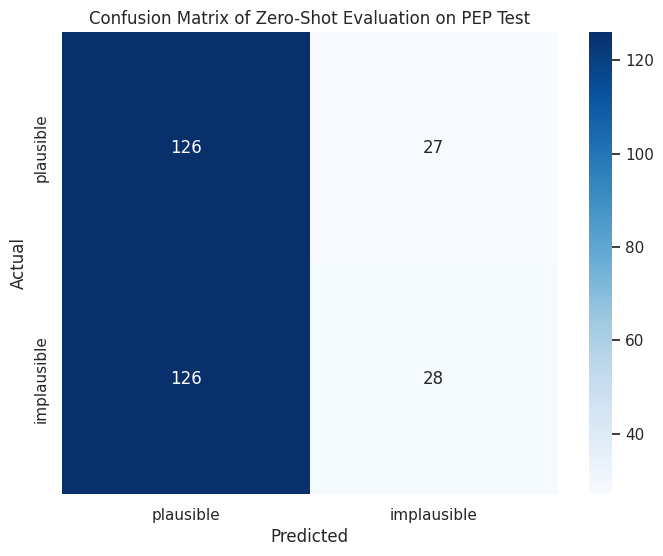

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[1,0])

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["plausible", "implausible"], yticklabels=["plausible", "implausible"])
plt.title("Confusion Matrix of Zero-Shot Evaluation on PEP Test")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


### Calculate individual class metrics

In [ ]:
# pep-3k
TP =126
TN = 28
FP = 126
FN = 27

# Precision, Recall, and F1 Score for "Plausible"
precision_plausible = TP / (TP + FP)
recall_plausible = TP / (TP + FN)
f1_plausible = 2 * (precision_plausible * recall_plausible) / (precision_plausible + recall_plausible)

# Precision, Recall, and F1 Score for "Not Plausible"
precision_not_plausible = TN / (TN + FN)
recall_not_plausible = TN / (TN + FP)
f1_not_plausible = 2 * (precision_not_plausible * recall_not_plausible) / (precision_not_plausible + recall_not_plausible)

# Printing the results
print(f"Precision for 'Plausible': {precision_plausible}")
print(f"Recall for 'Plausible': {recall_plausible}")
print(f"F1 Score for 'Plausible': {f1_plausible}")

print(f"Precision for 'Not Plausible': {precision_not_plausible}")
print(f"Recall for 'Not Plausible': {recall_not_plausible}")
print(f"F1 Score for 'Not Plausible': {f1_not_plausible}")


Precision for 'Plausible': 0.5
Recall for 'Plausible': 0.8235294117647058
F1 Score for 'Plausible': 0.6222222222222222
Precision for 'Not Plausible': 0.509090909090909
Recall for 'Not Plausible': 0.18181818181818182
F1 Score for 'Not Plausible': 0.26794258373205737


## Extract wrong predictions for qualitative analysis

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/augmented_processed/pep_test_predictions.csv')
df['is_incorrect'] = df['label'] != df['mapped prediction']

# Filter for incorrect predictions
incorrect_predictions = df[df['is_incorrect']]

# Print the incorrect predictions
# print(incorrect_predictions)
incorrect_predictions.to_csv("/content/drive/MyDrive/datasets/augmented_processed/pep_test_wrong_predictions.csv", index=False)